# House Prices - Advanced Regression Techniques

![](https://www.kaggle.com/static/images/site-logo.svg)


### Competition Description

![](https://storage.googleapis.com/kaggle-media/competitions/House%20Prices/kaggle_5407_media_housesbanner.png)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to ***predict the final price of each home***.

### Evaluation

#### Goal

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

#### Metric

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

### Data fields

- **SalePrice**: the property's sale price in dollars. _**This is the target variable that you're trying to predict**_.
- **MSSubClass**: The building class
- **MSZoning**: The general zoning classification
- **LotFrontage**: Linear feet of street connected to property
- **LotArea**: Lot size in square feet
- **Street**: Type of road access
- **Alley**: Type of alley access
- **LotShape**: General shape of property
- **LandContour**: Flatness of the property
- **Utilities**: Type of utilities available
- **LotConfig**: Lot configuration
- **LandSlope**: Slope of property
- **Neighborhood**: Physical locations within Ames city limits
- **Condition1**: Proximity to main road or railroad
- **Condition2**: Proximity to main road or railroad (if a second is present)
- **BldgType**: Type of dwelling
- **HouseStyle**: Style of dwelling
- **OverallQual**: Overall material and finish quality
- **OverallCond**: Overall condition rating
- **YearBuilt**: Original construction date
- **YearRemodAdd**: Remodel date
- **RoofStyle**: Type of roof
- **RoofMatl**: Roof material
- **Exterior1st**: Exterior covering on house
- **Exterior2nd**: Exterior covering on house (if more than one material)
- **MasVnrType**: Masonry veneer type
- **MasVnrArea**: Masonry veneer area in square feet
- **ExterQual**: Exterior material quality
- **ExterCond**: Present condition of the material on the exterior
- **Foundation**: Type of foundation
- **BsmtQual**: Height of the basement
- **BsmtCond**: General condition of the basement
- **BsmtExposure**: Walkout or garden level basement walls
- **BsmtFinType1**: Quality of basement finished area
- **BsmtFinSF1**: Type 1 finished square feet
- **BsmtFinType2**: Quality of second finished area (if present)
- **BsmtFinSF2**: Type 2 finished square feet
- **BsmtUnfSF**: Unfinished square feet of basement area
- **TotalBsmtSF**: Total square feet of basement area
- **Heating**: Type of heating
- **HeatingQC**: Heating quality and condition
- **CentralAir**: Central air conditioning
- **Electrical**: Electrical system
- **1stFlrSF**: First Floor square feet
- **2ndFlrSF**: Second floor square feet
- **LowQualFinSF**: Low quality finished square feet (all floors)
- **GrLivArea**: Above grade (ground) living area square feet
- **BsmtFullBath**: Basement full bathrooms
- **BsmtHalfBath**: Basement half bathrooms
- **FullBath**: Full bathrooms above grade
- **HalfBath**: Half baths above grade
- **Bedroom**: Number of bedrooms above basement level
- **Kitchen**: Number of kitchens
- **KitchenQual**: Kitchen quality
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **Functional**: Home functionality rating
- **Fireplaces**: Number of fireplaces
- **FireplaceQu**: Fireplace quality
- **GarageType**: Garage location
- **GarageYrBlt**: Year garage was built
- **GarageFinish**: Interior finish of the garage
- **GarageCars**: Size of garage in car capacity
- **GarageArea**: Size of garage in square feet
- **GarageQual**: Garage quality
- **GarageCond**: Garage condition
- **PavedDrive**: Paved driveway
- **WoodDeckSF**: Wood deck area in square feet
- **OpenPorchSF**: Open porch area in square feet
- **EnclosedPorch**: Enclosed porch area in square feet
- **3SsnPorch**: Three season porch area in square feet
- **ScreenPorch**: Screen porch area in square feet
- **PoolArea**: Pool area in square feet
- **PoolQC**: Pool quality
- **Fence**: Fence quality
- **MiscFeature**: Miscellaneous feature not covered in other categories
- **MiscVal**: $Value of miscellaneous feature
- **MoSold**: Month Sold
- **YrSold**: Year Sold
- **SaleType**: Type of sale
- **SaleCondition**: Condition of sale

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msn
from scipy.stats import norm, probplot, zscore
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)
pd.set_option('future.no_silent_downcasting', True)

## Exploratory Data Analysis (EDA)


![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*1nh42gcm3tZljyeQSqDvHQ.jpeg)


### Categorical Data:

> **Nominal data** is a type of categorical data that refers to <mark>_data that can be placed into categories but cannot be ordered_</mark>. Examples of nominal data include gender, eye color, and hair color.

> **Ordinal data** is another type of categorical data that refers to <mark>_data that can be placed into categories and can also be ordered_</mark>. Examples of ordinal data include education level (high school, bachelor’s degree, master’s degree) and customer satisfaction rating (1–5 stars).

### Numerical Data:

> **Discrete data** is a type of numerical <mark>_data that can only take certain values, such as integers_</mark>. Examples of discrete data include the number of children in a family and the number of cars sold by a dealership.

> **Continuous data** is a type of numerical <mark>_data that can take any value within a certain range_</mark>. Examples of continuous data include temperature and weight.

In [2]:
train["MSSubClass"] = train["MSSubClass"].astype("object")
train.drop(columns=["Id"], inplace=True)

In [3]:
def get_categorical(data):
    return [feature for feature in data.columns if data[feature].dtypes == 'O']

def get_numerical(data):
    return [feature for feature in data.columns if data[feature].dtypes != 'O']

In [4]:
categorical_features = get_categorical(train)
numerical_features = get_numerical(train)

### Numerical Data

In [5]:
train[numerical_features].head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [6]:
train[numerical_features].isnull().sum().sort_values(ascending=False)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
OpenPorchSF        0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
EnclosedPorch      0
BedroomAbvGr       0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
KitchenAbvGr       0
HalfBath           0
LotArea            0
BsmtUnfSF          0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtFinSF2         0
TotalBsmtSF        0
FullBath           0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
SalePrice          0
dtype: int64

In [7]:
features_to_complete = ["LotFrontage", "GarageYrBlt", "MasVnrArea"]

for feature in features_to_complete:
    median = train[feature].median()
    train[feature] = train[feature].fillna(median)


### 

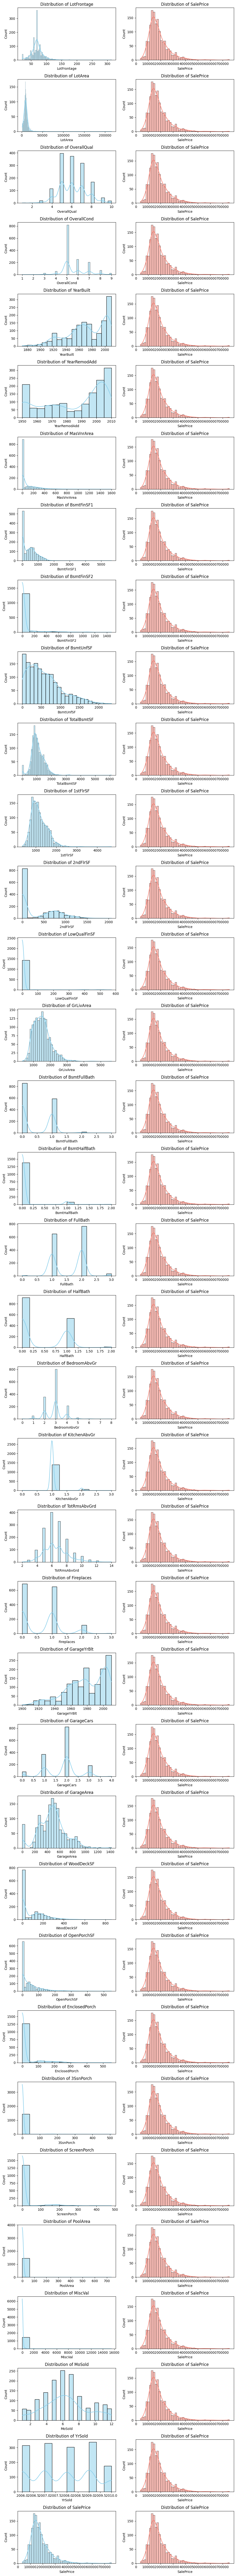

In [8]:

# Set up the figure and axes for plotting
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=2, figsize=(10, 3 * len(numerical_features)))

# Flatten the axes for easier iteration
# axes = axes.flatten()

# Iterate over numerical variables and plot histograms
for i, var in enumerate(numerical_features):
    sns.histplot(train[var], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Distribution of {var}')
    axes[i, 0].set_xlabel(var)

    sns.histplot(train['SalePrice'], kde=True, ax=axes[i, 1], color='salmon')
    axes[i, 1].set_title(f'Distribution of SalePrice')
    axes[i, 1].set_xlabel('SalePrice')
    

# Adjust layout
plt.tight_layout()
plt.show()

### 

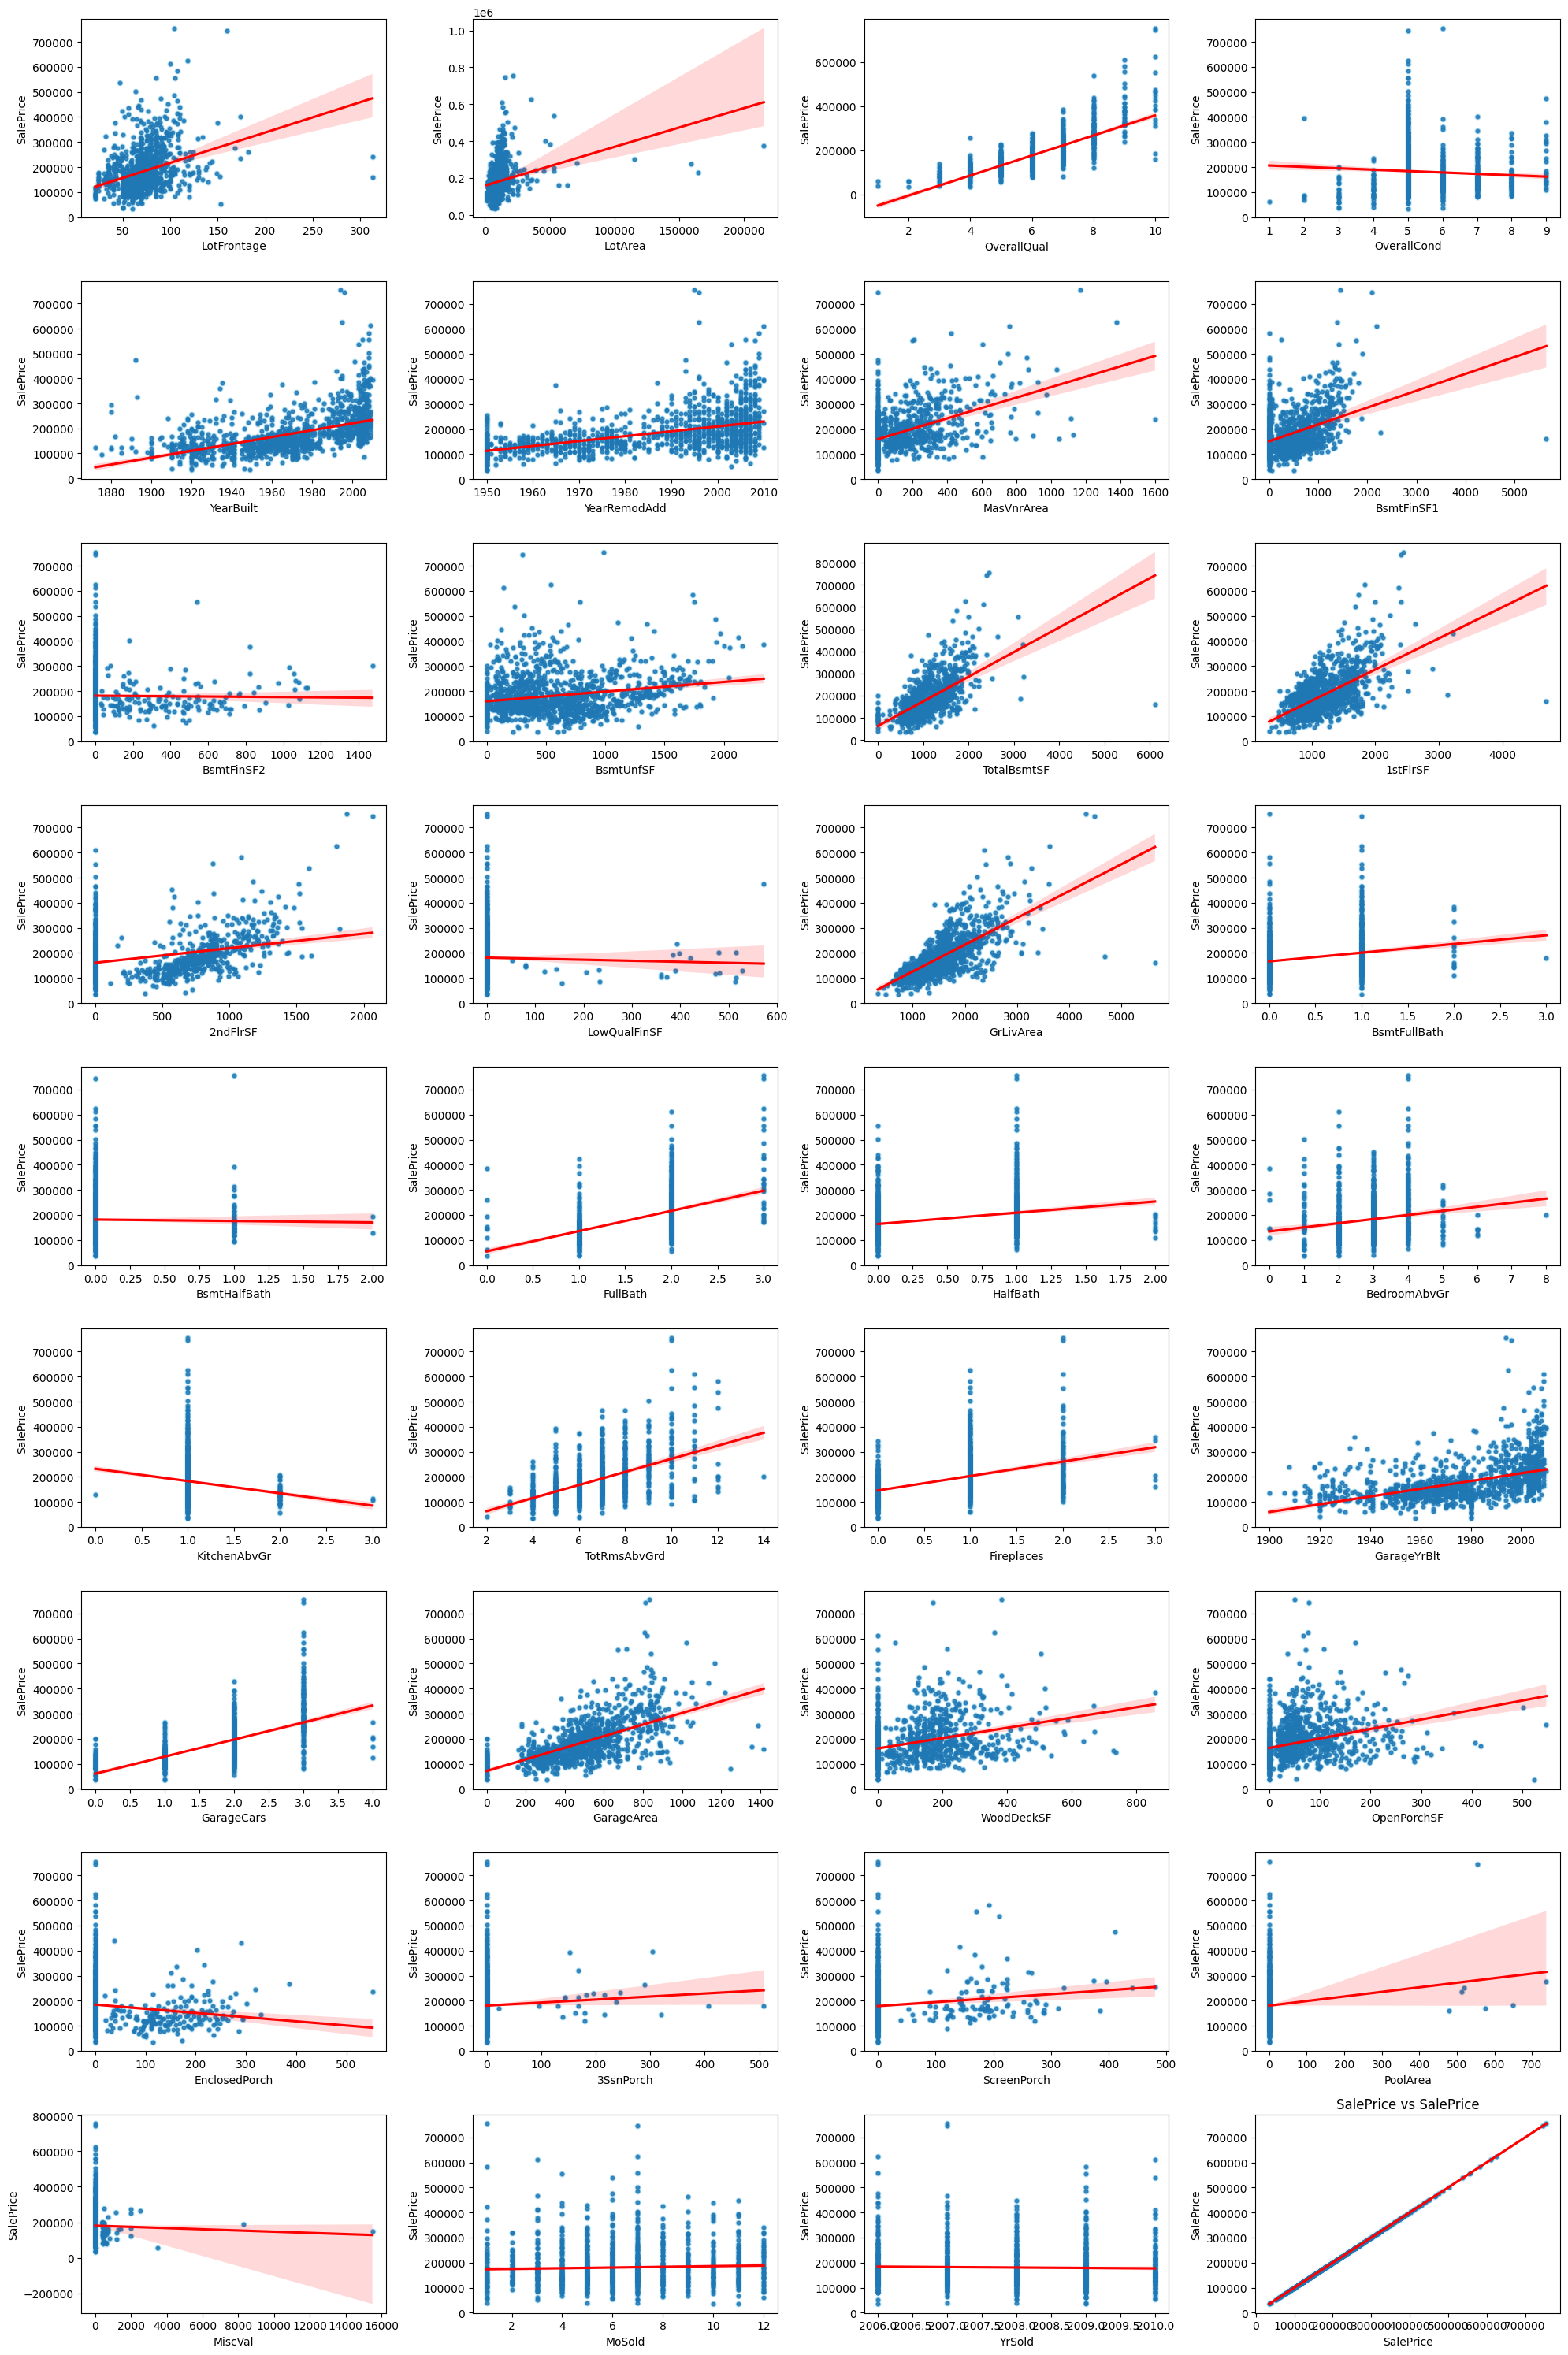

In [9]:
# Set up the figure and axes for plotting
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(20,30))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over numerical variables and plot histograms
for i, var in enumerate(numerical_features):
    sns.scatterplot(x=train[var], y=train['SalePrice'], alpha=0.7, ax=axes[i], color='skyblue')
    sns.regplot(x=train[var], y=train['SalePrice'], scatter_kws={'s': 10}, ax=axes[i], line_kws={'color': 'red'})
    plt.title('SalePrice vs {}'.format(var))
    plt.xlabel(var)
    plt.ylabel('SalePrice')

# Adjust layout
plt.tight_layout()
plt.show()

### Numerical Data Classification

- **Continuos**
  > LotFrontage, LotArea, MasVnrArea, OpenPorchSF, GrLivArea, 1stFlrSF, 2ndFlrSF, TotalBsmtSF, BsmtUnfSF, GarageArea, WoodDeckSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, BsmtFinSF1, BsmtFinSF2, LowQualFinSF
- **Discrete**
  > OverallQual, GarageCars, TotRmsAbvGrd, FullBath, Fireplaces, MoSold, HalfBath, OverallCond, BedroomAbvGr, KitchenAbvGr, BsmtFullBath, BsmtHalfBath     
- **Time**
  > YearBuilt, YearRemodAdd, GarageYrBlt, YrSold


### Skewness
> In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.
> - Positive value means the distribution is skewed to the right.
> - Negative value means the distribution is skewed to the left.
> - 0 means perfect normal distribution. The bell shaped curve.

> _**We can handle skewed data using mathematical transformers.**_

In [10]:
continuos_features = ['LotFrontage', 'LotArea', 'MasVnrArea', 'OpenPorchSF', 'GrLivArea', 
                      '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'BsmtUnfSF', 'GarageArea', 
                        'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                      'PoolArea', 'MiscVal', 'BsmtFinSF1', 'BsmtFinSF2', 'LowQualFinSF', 'SalePrice']

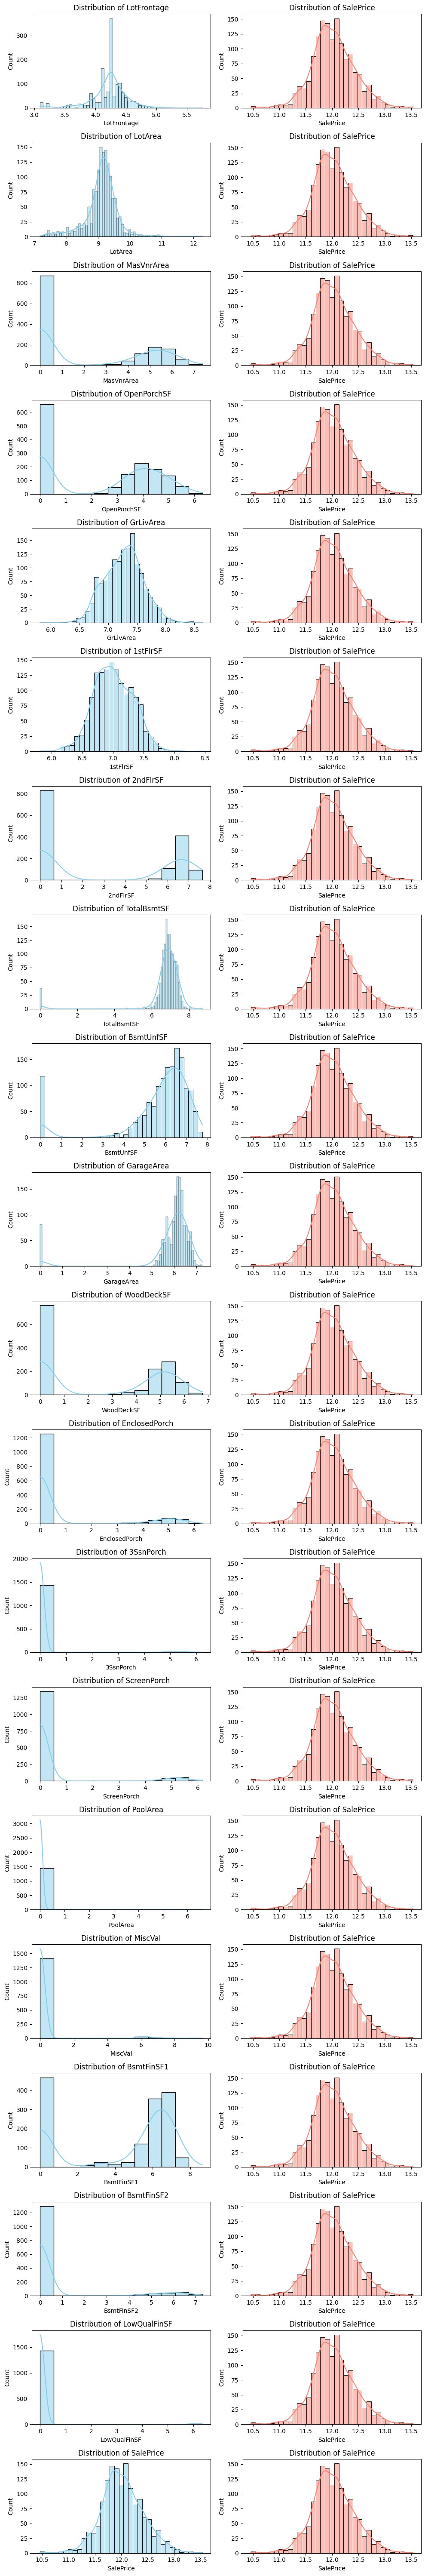

In [11]:

# Set up the figure and axes for plotting

fig, axes = plt.subplots(nrows=len(continuos_features), ncols=2, figsize=(10, 3 * len(continuos_features)))

# Flatten the axes for easier iteration
# axes = axes.flatten()

# Iterate over numerical variables and plot histograms
for i, var in enumerate(continuos_features):
    sns.histplot(np.log(train[var] + 1), kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Distribution of {var}')
    axes[i, 0].set_xlabel(var)

    sns.histplot(np.log(train['SalePrice'] + 1), kde=True, ax=axes[i, 1], color='salmon')
    axes[i, 1].set_title(f'Distribution of SalePrice')
    axes[i, 1].set_xlabel('SalePrice')
    

# Adjust layout
plt.tight_layout()
plt.show()


In [12]:
from sklearn.feature_selection import mutual_info_regression

# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


### Mutual Information and What it Measures

> Mutual information describes relationships in terms of uncertainty. The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. If you knew the value of a feature, how much more confident would you be about the target?

In [13]:
mi_scores = make_mi_scores(train[numerical_features], train['SalePrice'])

In [14]:
mi_scores

SalePrice        5.893013e+00
OverallQual      5.786503e-01
GarageArea       4.927946e-01
GrLivArea        4.328080e-01
YearBuilt        4.087151e-01
TotalBsmtSF      3.995179e-01
LotArea          3.924269e-01
GarageCars       3.601015e-01
GarageYrBlt      2.988334e-01
1stFlrSF         2.832649e-01
YearRemodAdd     2.756588e-01
FullBath         2.731560e-01
LotFrontage      2.178304e-01
TotRmsAbvGrd     2.079625e-01
OpenPorchSF      1.890468e-01
Fireplaces       1.702530e-01
2ndFlrSF         1.678137e-01
BsmtFinSF1       1.566927e-01
BsmtUnfSF        1.273479e-01
OverallCond      1.096556e-01
WoodDeckSF       1.032598e-01
MasVnrArea       9.330231e-02
HalfBath         8.845618e-02
BedroomAbvGr     6.848434e-02
KitchenAbvGr     2.375965e-02
ScreenPorch      2.118128e-02
EnclosedPorch    2.082925e-02
BsmtFullBath     1.318343e-02
BsmtHalfBath     1.131273e-02
LowQualFinSF     6.635548e-03
YrSold           3.618707e-03
BsmtFinSF2       2.734002e-03
3SsnPorch        7.615664e-04
PoolArea  

### Numerical Features Scores

|Feature|Score|
|------|------|
|OverallQual     |5.786503e-01|
|GarageArea       |4.927946e-01|
|GrLivArea        |4.328080e-01|
|YearBuilt        |4.087151e-01|
|TotalBsmtSF      |3.995179e-01|
|LotArea          |3.924269e-01|
|GarageCars       |3.601015e-01|
|GarageYrBlt      |2.988334e-01|
|1stFlrSF         |2.832649e-01|
|YearRemodAdd     |2.756588e-01|
|FullBath         |2.731560e-01|
|LotFrontage      |2.178304e-01|
|TotRmsAbvGrd     |2.079625e-01|

In [15]:
discrete_selected = ['OverallQual', 'GarageCars', 'TotRmsAbvGrd', 'FullBath']
continuos_selected = ['LotFrontage', 'LotArea', 'GrLivArea', '1stFlrSF', 'TotalBsmtSF', 'GarageArea']
time_selected = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

## Scaling and Normalization

> One of the reasons that it's easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that:

> - in scaling, you're changing the range of your data, while
> - in normalization, you're changing the shape of the distribution of your data.
>   


In [16]:
std_scaler = StandardScaler()
target_std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
time_minmax_scaler = MinMaxScaler(feature_range=(0, 1))
robust_scaler = RobustScaler()

def transform_data(scaler, data, features):
    scaled = scaler.fit_transform(data[features])
    return pd.DataFrame(scaled, columns=features)

In [17]:
time_scaled = transform_data(time_minmax_scaler, train[time_selected], time_selected)
continuos_scaled = transform_data(std_scaler, train[continuos_selected], continuos_selected)
target_scaled = transform_data(target_std_scaler, train[['SalePrice']], ['SalePrice'])
discrete_scaled = transform_data(minmax_scaler, train[discrete_selected], discrete_selected)

In [18]:
print('StandardScaler -> mean {0}, std {1}, var {2}'.format(std_scaler.mean_, std_scaler.scale_, std_scaler.var_))
print('TargetScaler -> mean {0}, std {1}, var {2}'.format(target_std_scaler.mean_, target_std_scaler.scale_, target_std_scaler.var_))
print('minmax_scaler -> min {0}, scale {1}'.format(minmax_scaler.min_, minmax_scaler.scale_))
print('time_minmax_scaler -> min {0}, scale {1}'.format(time_minmax_scaler.min_, time_minmax_scaler.scale_))


StandardScaler -> mean [   69.86369863 10516.82808219  1515.46369863  1162.62671233
  1057.42945205   472.98013699], std [  22.02013207 9977.84610545  525.30039356  386.4553223   438.55505717
  213.73160808], var [4.84886216e+02 9.95574129e+07 2.75940503e+05 1.49347716e+05
 1.92330538e+05 4.56812003e+04]
TargetScaler -> mean [180921.19589041], std [79415.29188607], var [6.30678859e+09]
minmax_scaler -> min [-0.11111111  0.         -0.16666667  0.        ], scale [0.11111111 0.25       0.08333333 0.33333333]
time_minmax_scaler -> min [-13.56521739 -32.5        -17.27272727], scale [0.00724638 0.01666667 0.00909091]


## Categorical Data

In [19]:
train[categorical_features].head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0         60       RL   Pave   NaN      Reg         Lvl    AllPub    Inside   
1         20       RL   Pave   NaN      Reg         Lvl    AllPub       FR2   
2         60       RL   Pave   NaN      IR1         Lvl    AllPub    Inside   
3         70       RL   Pave   NaN      IR1         Lvl    AllPub    Corner   
4         60       RL   Pave   NaN      IR1         Lvl    AllPub       FR2   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story     Gable   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story     Gable   
3       Gtl      Crawfor       Norm       Norm     1Fam     2Story     Gable   
4       Gtl      NoRidge       Norm       Norm     1Fam     2Story     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation  \
0  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc   
1  CompShg     MetalSd     MetalSd        NaN        TA        TA     CBlock   
2  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc   
3  CompShg     Wd Sdng     Wd Shng        NaN        TA        TA     BrkTil   
4  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA      PConc   

  BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       Gd       TA           No          GLQ          Unf    GasA        Ex   
1       Gd       TA           Gd          ALQ          Unf    GasA        Ex   
2       Gd       TA           Mn          GLQ          Unf    GasA        Ex   
3       TA       Gd           No          ALQ          Unf    GasA        Gd   
4       Gd       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [20]:
missing_values = train[categorical_features].isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_percentages = (missing_values / len(train)) * 100
missing_info = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage': missing_percentages})
unique_counts = train[categorical_features].nunique()
missing_info['Unique Values'] = unique_counts[missing_values.index]
missing_info = missing_info.sort_values(by='Missing Percentage', ascending=False)
print(missing_info)
total_rows = len(train.index)
print("\nTOTAL ROWS NUMBER:", total_rows)

              Missing Count  Missing Percentage  Unique Values
PoolQC                 1453           99.520548              3
MiscFeature            1406           96.301370              4
Alley                  1369           93.767123              2
Fence                  1179           80.753425              4
MasVnrType              872           59.726027              3
FireplaceQu             690           47.260274              5
GarageType               81            5.547945              6
GarageFinish             81            5.547945              3
GarageQual               81            5.547945              5
GarageCond               81            5.547945              5
BsmtExposure             38            2.602740              4
BsmtFinType2             38            2.602740              6
BsmtQual                 37            2.534247              4
BsmtCond                 37            2.534247              4
BsmtFinType1             37            2.534247        

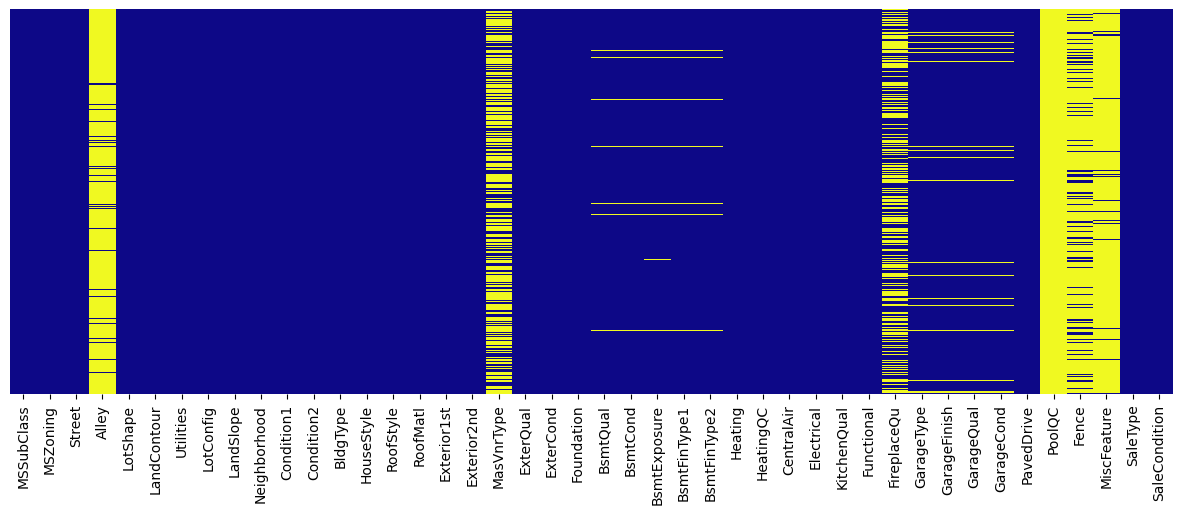

In [21]:
plt.rcParams["figure.figsize"] = (15, 5)
sns.heatmap(train[categorical_features].isnull(), yticklabels=False, cbar=False, cmap="plasma");

In [22]:
train['Electrical'] = train['Electrical'].fillna(train["Electrical"].mode()[0])
train[categorical_features] = train[categorical_features].fillna("No Apply")

In [23]:
train[categorical_features].head()

MSSubClass MSZoning Street     Alley LotShape LandContour Utilities  \
0         60       RL   Pave  No Apply      Reg         Lvl    AllPub   
1         20       RL   Pave  No Apply      Reg         Lvl    AllPub   
2         60       RL   Pave  No Apply      IR1         Lvl    AllPub   
3         70       RL   Pave  No Apply      IR1         Lvl    AllPub   
4         60       RL   Pave  No Apply      IR1         Lvl    AllPub   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1     Gable  CompShg     MetalSd     MetalSd   No Apply        TA        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
3     Gable  CompShg     Wd Sdng     Wd Shng   No Apply        TA        TA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating  \
0      PConc       Gd       TA           No          GLQ          Unf    GasA   
1     CBlock       Gd       TA           Gd          ALQ          Unf    GasA   
2      PConc       Gd       TA           Mn          GLQ          Unf    GasA   
3     BrkTil       TA       Gd           No          ALQ          Unf    GasA   
4      PConc       Gd       TA           Av          GLQ          Unf    GasA   

  HeatingQC CentralAir Electrical KitchenQual Functional FireplaceQu  \
0        Ex          Y      SBrkr          Gd        Typ    No Apply   
1        Ex          Y      SBrkr          TA        Typ          TA   
2        Ex          Y      SBrkr          Gd        Typ          TA   
3        Gd          Y      SBrkr          Gd        Typ          Gd   
4        Ex          Y      SBrkr          Gd        Typ          TA   

  GarageType GarageFinish GarageQual GarageCond PavedDrive    PoolQC  \
0     Attchd          RFn         TA         TA          Y  No Apply   
1     Attchd          RFn         TA         TA          Y  No Apply   
2     Attchd          RFn         TA         TA          Y  No Apply   
3     Detchd          Unf         TA         TA          Y  No Apply   
4     Attchd          RFn         TA         TA          Y  No Apply   

      Fence MiscFeature SaleType SaleCondition  
0  No Apply    No Apply       WD        Normal  
1  No Apply    No Apply       WD        Normal  
2  No Apply    No Apply       WD        Normal  
3  No Apply    No Apply       WD       Abnorml  
4  No Apply    No Apply       WD        Normal

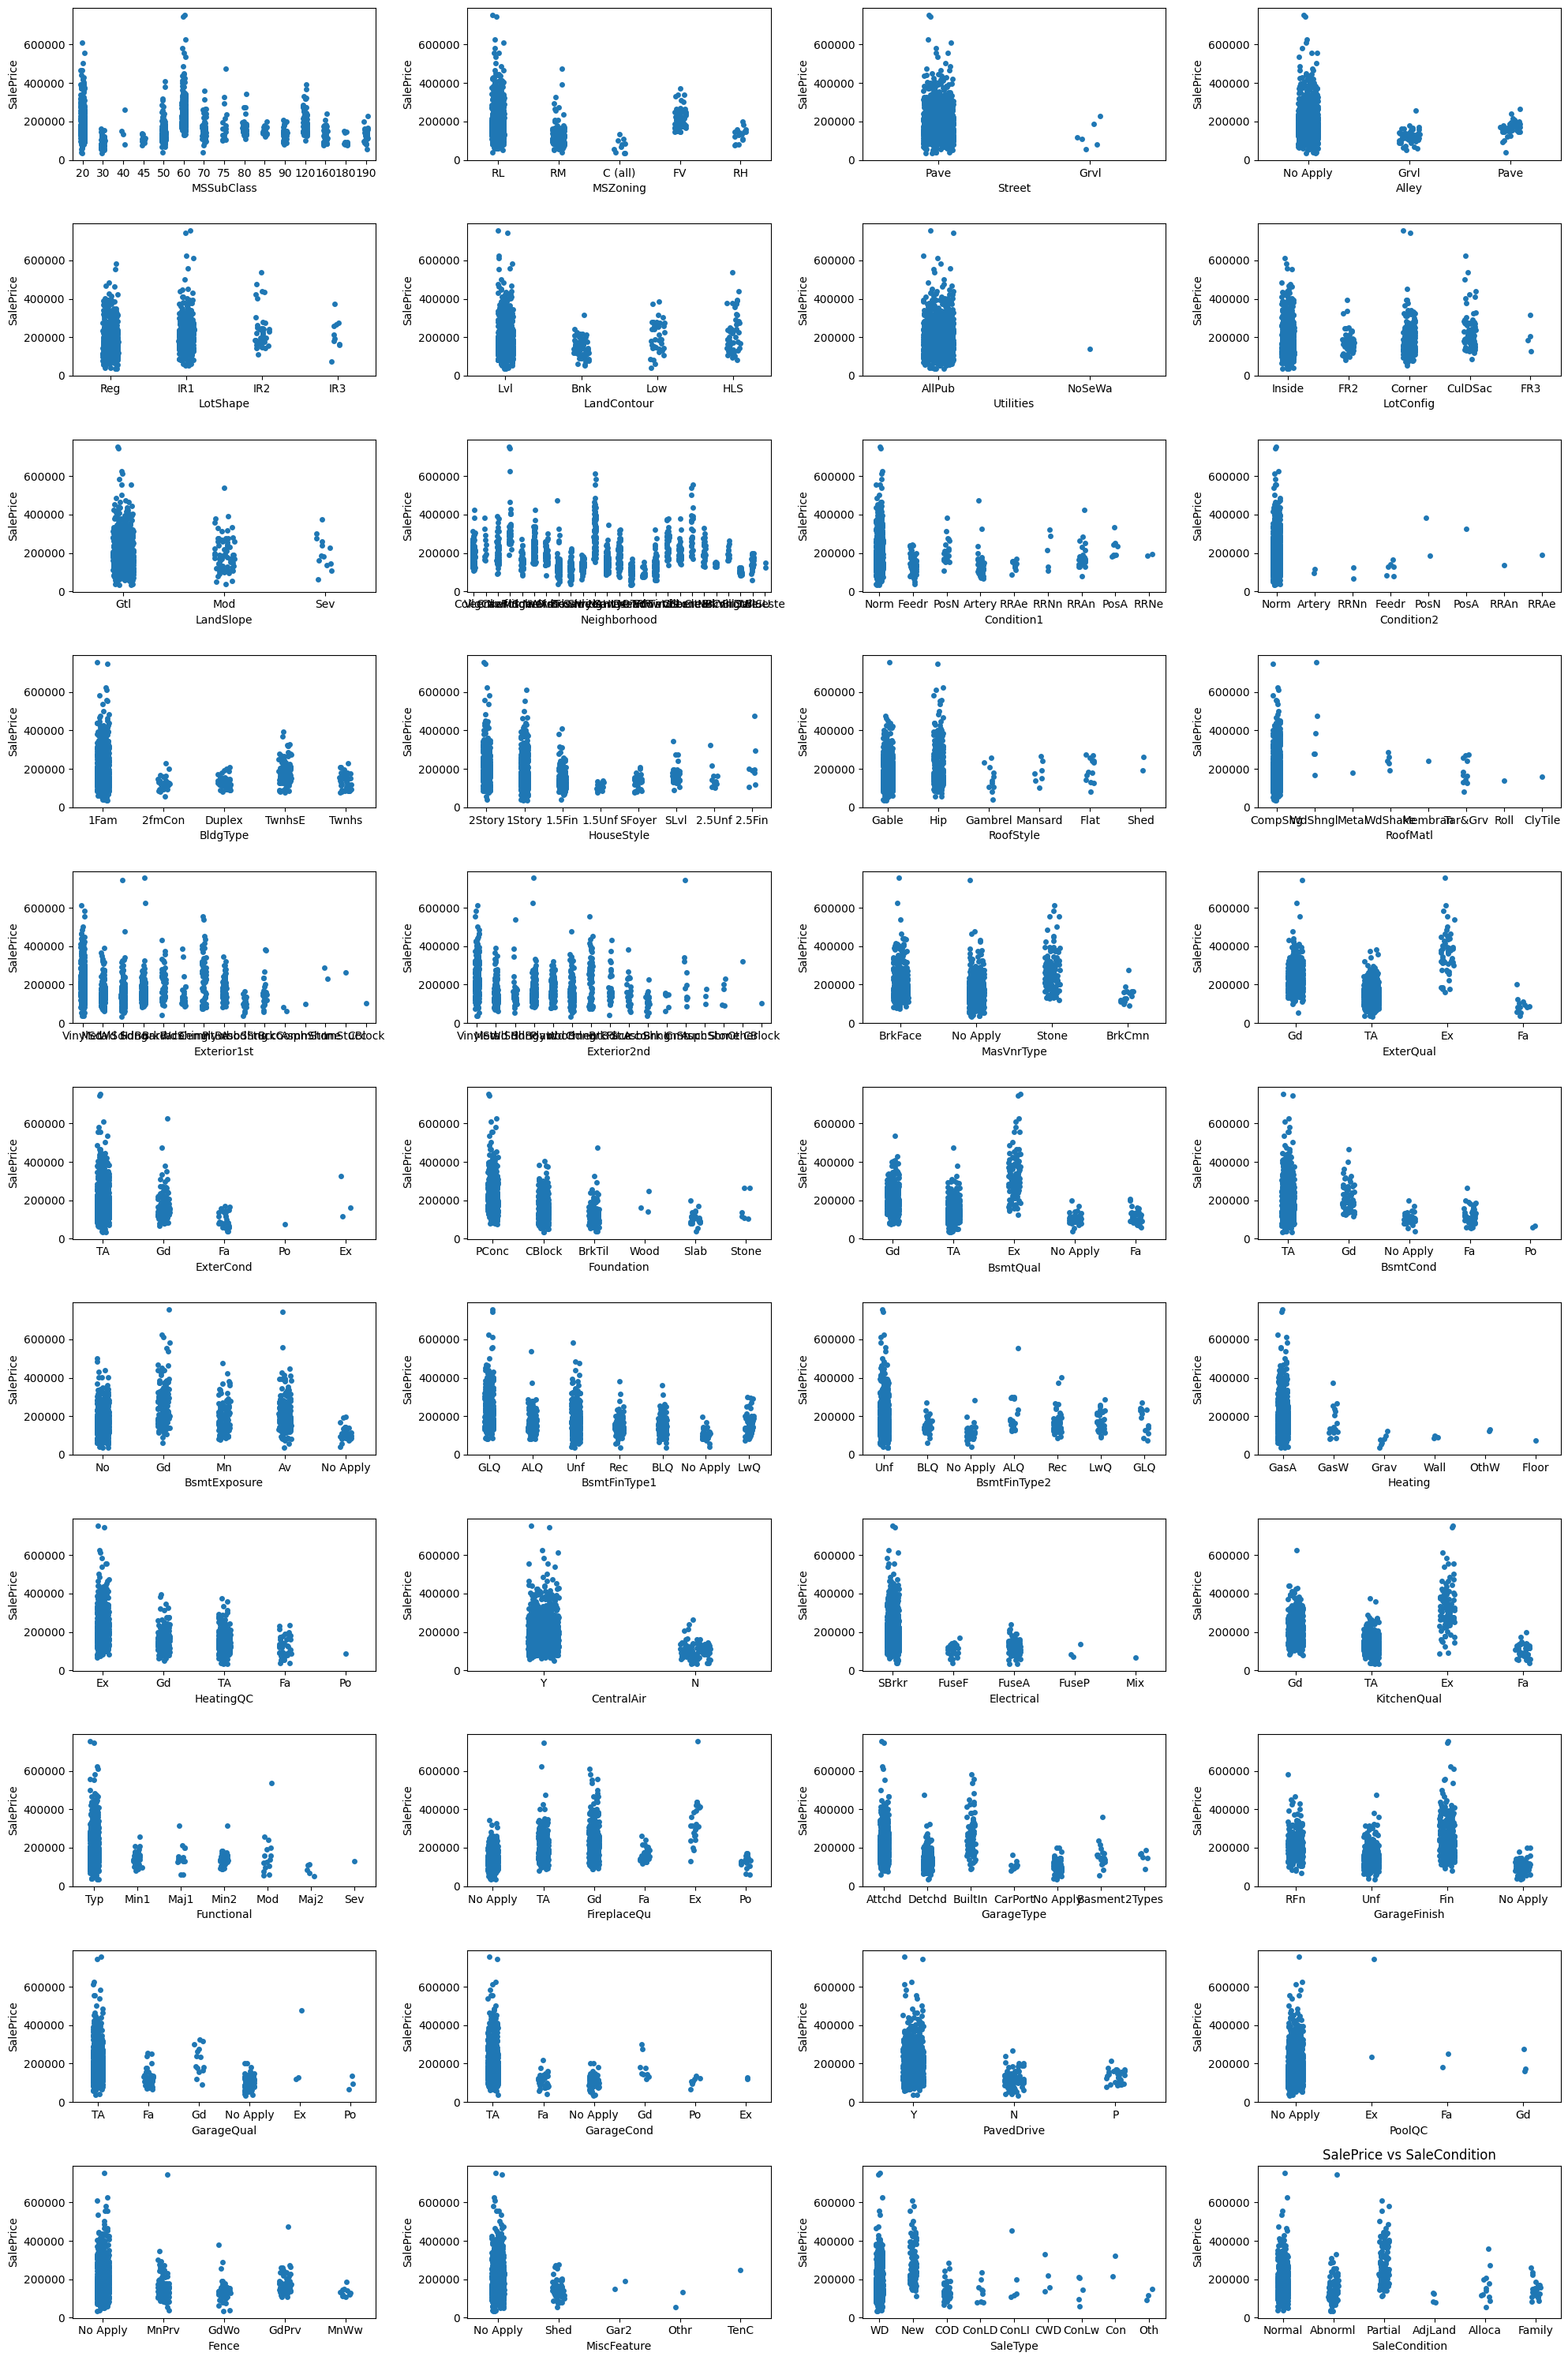

In [24]:
# Set up the figure and axes for plotting
fig, axes = plt.subplots(nrows=11, ncols=4, figsize=(20,30))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over numerical variables and plot histograms
for i, var in enumerate(categorical_features):
    sns.stripplot(x=train[var], y=train['SalePrice'], ax=axes[i])
    plt.title('SalePrice vs {}'.format(var))
    plt.xlabel(var)
    plt.ylabel('SalePrice')

# Adjust layout
plt.tight_layout()
plt.show()

In [25]:
mi_scores_cat = make_mi_scores(train[categorical_features], train['SalePrice'])

In [26]:
mi_scores_cat

Neighborhood     5.272377e-01
BsmtQual         3.263442e-01
ExterQual        3.246676e-01
KitchenQual      3.198543e-01
MSSubClass       2.817190e-01
GarageFinish     2.733159e-01
FireplaceQu      2.122822e-01
GarageType       2.011072e-01
Foundation       1.990363e-01
HeatingQC        1.679056e-01
Exterior2nd      1.619401e-01
BsmtFinType1     1.466812e-01
Exterior1st      1.319800e-01
MSZoning         1.230096e-01
MasVnrType       1.041771e-01
LotShape         9.315045e-02
SaleCondition    8.104959e-02
SaleType         8.081031e-02
HouseStyle       8.026861e-02
GarageCond       7.880803e-02
BsmtExposure     7.806531e-02
CentralAir       6.867649e-02
GarageQual       6.802642e-02
Electrical       5.377177e-02
BsmtCond         5.254964e-02
Fence            4.990046e-02
PavedDrive       4.780738e-02
BldgType         4.234267e-02
BsmtFinType2     3.254669e-02
LandContour      2.508492e-02
Alley            2.480834e-02
Condition1       2.036659e-02
RoofStyle        1.837956e-02
Heating   

### Categorical Features Scores

|Feature|Score|
|------|------|
|Neighborhood     |5.272377e-01|
|BsmtQual         |3.263442e-01|
|ExterQual        |3.246676e-01|
|KitchenQual      |3.198543e-01|
|MSSubClass       |2.817190e-01|
|GarageFinish     |2.733159e-01|
|FireplaceQu      |2.122822e-01|
|GarageType       |2.011072e-01|

In [27]:
ordinal_selected = ['BsmtQual', 'ExterQual', 'KitchenQual', 'FireplaceQu']
nominal_selected = ['Neighborhood', 'MSSubClass', 'GarageType', 'GarageFinish']

In [28]:
label = LabelEncoder()


def encode_data(encoder, data, features):
    df = pd.DataFrame()

    for feature in features:
        print(feature)
        data_fitted = encoder.fit(data[feature])
        print(encoder.classes_)
        df[feature] = encoder.transform(data[feature])

    return df

In [29]:
ordinal_encoded = encode_data(label, train[ordinal_selected], ordinal_selected)
nominal_encoded = encode_data(label, train[nominal_selected], nominal_selected)

BsmtQual
['Ex' 'Fa' 'Gd' 'No Apply' 'TA']
ExterQual
['Ex' 'Fa' 'Gd' 'TA']
KitchenQual
['Ex' 'Fa' 'Gd' 'TA']
FireplaceQu
['Ex' 'Fa' 'Gd' 'No Apply' 'Po' 'TA']
Neighborhood
['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']
MSSubClass
[20 30 40 45 50 60 70 75 80 85 90 120 160 180 190]
GarageType
['2Types' 'Attchd' 'Basment' 'BuiltIn' 'CarPort' 'Detchd' 'No Apply']
GarageFinish
['Fin' 'No Apply' 'RFn' 'Unf']


In [30]:

to_train = pd.concat([continuos_scaled, discrete_scaled, time_scaled, ordinal_encoded, nominal_encoded], axis=1)

In [31]:
to_train.head()

LotFrontage   LotArea  GrLivArea  1stFlrSF  TotalBsmtSF  GarageArea  \
0    -0.220875 -0.207142   0.370333 -0.793434    -0.459303    0.351000   
1     0.460320 -0.091886  -0.482512  0.257140     0.466465   -0.060731   
2    -0.084636  0.073480   0.515013 -0.627826    -0.313369    0.631726   
3    -0.447940 -0.096897   0.383659 -0.521734    -0.687324    0.790804   
4     0.641972  0.375148   1.299326 -0.045611     0.199680    1.698485   

   OverallQual  GarageCars  TotRmsAbvGrd  FullBath  YearBuilt  YearRemodAdd  \
0     0.666667        0.50      0.500000  0.666667   0.949275      0.883333   
1     0.555556        0.50      0.333333  0.666667   0.753623      0.433333   
2     0.666667        0.50      0.333333  0.666667   0.934783      0.866667   
3     0.666667        0.75      0.416667  0.333333   0.311594      0.333333   
4     0.777778        0.75      0.583333  0.666667   0.927536      0.833333   

   GarageYrBlt  BsmtQual  ExterQual  KitchenQual  FireplaceQu  Neighborhood  \
0     0.936364         2          2            2            3             5   
1     0.690909         2          3            3            5            24   
2     0.918182         2          2            2            5             5   
3     0.890909         4          3            2            2             6   
4     0.909091         2          2            2            5            15   

   MSSubClass  GarageType  GarageFinish  
0           5           1             2  
1           0           1             2  
2           5           1             2  
3           6           5             3  
4           5           1             2

In [32]:
x = to_train.values
y = target_scaled.values

## Designing Neural Network Architecture

![](https://miro.medium.com/v2/resize:fit:720/format:webp/0*_SH7tsNDTkGXWtZb.png)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [34]:
# Build the neural network
model = Sequential()
model.add(Dense(32, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(32, activation='relu')) # Hidden 2
model.add(Dense(32, activation='relu')) # Hidden 2
model.add(Dense(32, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)


Epoch 1/1000


/opt/anaconda3/envs/my_aia/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 - 0s - 10ms/step - loss: 0.7328 - val_loss: 0.4757
Epoch 2/1000
35/35 - 0s - 692us/step - loss: 0.3711 - val_loss: 0.2956
Epoch 3/1000
35/35 - 0s - 631us/step - loss: 0.2505 - val_loss: 0.2145
Epoch 4/1000
35/35 - 0s - 564us/step - loss: 0.1970 - val_loss: 0.1900
Epoch 5/1000
35/35 - 0s - 569us/step - loss: 0.1615 - val_loss: 0.1898
Epoch 6/1000
35/35 - 0s - 574us/step - loss: 0.1418 - val_loss: 0.1713
Epoch 7/1000
35/35 - 0s - 572us/step - loss: 0.1264 - val_loss: 0.1565
Epoch 8/1000
35/35 - 0s - 556us/step - loss: 0.1181 - val_loss: 0.1601
Epoch 9/1000
35/35 - 0s - 568us/step - loss: 0.1193 - val_loss: 0.1527
Epoch 10/1000
35/35 - 0s - 548us/step - loss: 0.1143 - val_loss: 0.1522
Epoch 11/1000
35/35 - 0s - 566us/step - loss: 0.1054 - val_loss: 0.1505
Epoch 12/1000
35/35 - 0s - 556us/step - loss: 0.1072 - val_loss: 0.1487
Epoch 13/1000
35/35 - 0s - 557us/step - loss: 0.1005 - val_loss: 0.1738
Epoch 14/1000
35/35 - 0s - 569us/step - loss: 0.0947 - val_loss: 0.1474
Epoch 15/1000
3

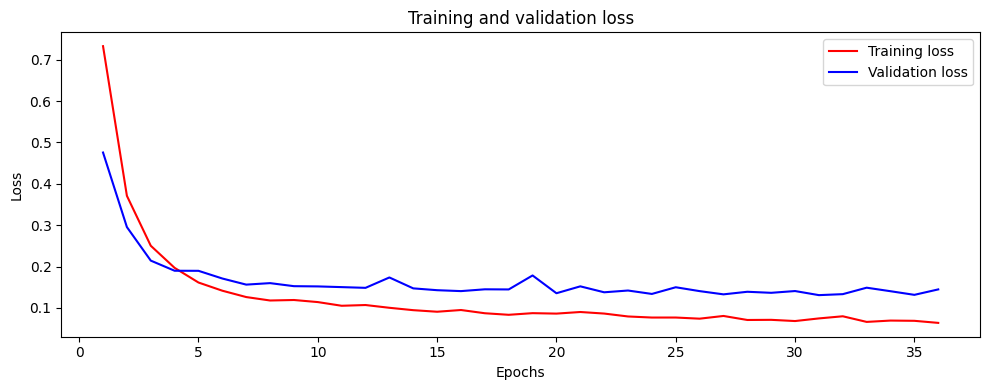

In [35]:
plt.figure(figsize=(10, 4))

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

## Pre-Processing Test Data

In [36]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [37]:
test["MSSubClass"] = test["MSSubClass"].astype("object")
test.drop(columns=["Id"], inplace=True)

In [38]:
test_numerical_selected_features = discrete_selected + continuos_selected + time_selected

for feature in test_numerical_selected_features:

    median = test[feature].median()
    test[feature] = test[feature].fillna(median)

test['Electrical'] = test['Electrical'].fillna(test["Electrical"].mode()[0])
test[categorical_features] = test[categorical_features].fillna("No Apply")


In [39]:
def transform(scaler, data, features):
    scaled = scaler.transform(data[features])
    return pd.DataFrame(scaled, columns=features)

test_time_scaled = transform(time_minmax_scaler, test[time_selected], time_selected)
test_continuos_scaled = transform(std_scaler, test[continuos_selected], continuos_selected)
test_discrete_scaled = transform(minmax_scaler, test[discrete_selected], discrete_selected)

test_ordinal_encoded = encode_data(label, test[ordinal_selected], ordinal_selected)
test_nominal_encoded = encode_data(label, test[nominal_selected], nominal_selected)

BsmtQual
['Ex' 'Fa' 'Gd' 'No Apply' 'TA']
ExterQual
['Ex' 'Fa' 'Gd' 'TA']
KitchenQual
['Ex' 'Fa' 'Gd' 'No Apply' 'TA']
FireplaceQu
['Ex' 'Fa' 'Gd' 'No Apply' 'Po' 'TA']
Neighborhood
['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']
MSSubClass
[20 30 40 45 50 60 70 75 80 85 90 120 150 160 180 190]
GarageType
['2Types' 'Attchd' 'Basment' 'BuiltIn' 'CarPort' 'Detchd' 'No Apply']
GarageFinish
['Fin' 'No Apply' 'RFn' 'Unf']


In [40]:
to_test = pd.concat([test_continuos_scaled, test_discrete_scaled, test_time_scaled, test_ordinal_encoded, test_nominal_encoded],  axis=1)

In [41]:
to_test.head()

LotFrontage   LotArea  GrLivArea  1stFlrSF  TotalBsmtSF  GarageArea  \
0     0.460320  0.110763  -1.179256 -0.689929    -0.400017    1.202536   
1     0.505733  0.375850  -0.354966  0.430511     0.619239   -0.753188   
2     0.187842  0.332053   0.216136 -0.607125    -0.295127    0.042202   
3     0.369494 -0.054002   0.168544 -0.612300    -0.299687   -0.013943   
4    -1.219961 -0.552407  -0.448246  0.303718     0.507509    0.154492   

   OverallQual  GarageCars  TotRmsAbvGrd  FullBath  YearBuilt  YearRemodAdd  \
0     0.444444        0.25      0.250000  0.333333   0.644928      0.183333   
1     0.555556        0.25      0.333333  0.333333   0.623188      0.133333   
2     0.444444        0.50      0.333333  0.666667   0.905797      0.800000   
3     0.555556        0.50      0.416667  0.666667   0.913043      0.800000   
4     0.777778        0.50      0.250000  0.666667   0.869565      0.700000   

   GarageYrBlt  BsmtQual  ExterQual  KitchenQual  FireplaceQu  Neighborhood  \
0     0.554545         4          3            4            3            12   
1     0.527273         4          3            2            3            12   
2     0.881818         2          3            4            5             8   
3     0.890909         4          3            2            2             8   
4     0.836364         2          2            2            3            22   

   MSSubClass  GarageType  GarageFinish  
0           0           1             3  
1           0           1             3  
2           5           1             0  
3           5           1             0  
4          11           1             2

## Prediction

In [42]:
prediction = model.predict(to_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step


In [43]:
to_test['SalePrice'] = prediction

In [44]:
to_test.head()

LotFrontage   LotArea  GrLivArea  1stFlrSF  TotalBsmtSF  GarageArea  \
0     0.460320  0.110763  -1.179256 -0.689929    -0.400017    1.202536   
1     0.505733  0.375850  -0.354966  0.430511     0.619239   -0.753188   
2     0.187842  0.332053   0.216136 -0.607125    -0.295127    0.042202   
3     0.369494 -0.054002   0.168544 -0.612300    -0.299687   -0.013943   
4    -1.219961 -0.552407  -0.448246  0.303718     0.507509    0.154492   

   OverallQual  GarageCars  TotRmsAbvGrd  FullBath  YearBuilt  YearRemodAdd  \
0     0.444444        0.25      0.250000  0.333333   0.644928      0.183333   
1     0.555556        0.25      0.333333  0.333333   0.623188      0.133333   
2     0.444444        0.50      0.333333  0.666667   0.905797      0.800000   
3     0.555556        0.50      0.416667  0.666667   0.913043      0.800000   
4     0.777778        0.50      0.250000  0.666667   0.869565      0.700000   

   GarageYrBlt  BsmtQual  ExterQual  KitchenQual  FireplaceQu  Neighborhood  \
0     0.554545         4          3            4            3            12   
1     0.527273         4          3            2            3            12   
2     0.881818         2          3            4            5             8   
3     0.890909         4          3            2            2             8   
4     0.836364         2          2            2            3            22   

   MSSubClass  GarageType  GarageFinish  SalePrice  
0           0           1             3  -0.602481  
1           0           1             3  -0.304214  
2           5           1             0  -0.038353  
3           5           1             0  -0.048954  
4          11           1             2   0.112461

In [45]:
prediction_inversed = target_std_scaler.inverse_transform(prediction)
prediction_inversed = pd.DataFrame(prediction_inversed, columns=['SalePrice'])

In [46]:
id_list = np.arange(1461,2920).astype(int)
df = pd.DataFrame()
df['Id'] = id_list
df['SalePrice'] = prediction_inversed['SalePrice']

In [47]:
df.to_csv('submission2.csv', columns=['Id','SalePrice'], index=False)

In [48]:
model.save('my_model.keras')